# Reinforcement Learning Lab: Assignment 1 
**Concepts covered**    : 
* Sampling from distribution
* Expectation of a function of random variable
* Markov chains

**Team members**  : 
* Jayanth S (201081003)
* Praveen Kumar N (201082001)
* Rishabh Roy (201082002)

## REFERENCES

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

[A simple method for numerical integration in python](https://towardsdatascience.com/a-simple-method-for-numerical-integration-in-python-7906c1703af8)

[scipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

[PyDTMC gihub repo](https://github.com/TommasoBelluzzo/PyDTMC)

## IMPORTS

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import scipy.integrate as integrate
import scipy.stats as stats
import scipy as sp
!pip install PyDTMC
import pydtmc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

     |████████████████████████████████| 47 kB 2.2 MB/s 


## PROBLEM 1

In [ ]:
class Problem_1:

  def __init__ (self, n_samples_list):

    self.n_samples_list = n_samples_list

  def plot_hist_multinomial (self, Probs):
    
      Num_outcomes = len(Probs)
      Outcomes     = np.arange(0, Num_outcomes)
      fig,axes     = plt.subplots(1,len(self.n_samples_list),figsize=(14,5))
      fig.suptitle("Histogram of n samples from multinomial distribution with {} outcomes".format(Num_outcomes))

      for i in range(len(self.n_samples_list)): 
          n          = n_samples_list[i]
          multi_samp = np.random.multinomial(n, Probs, size=1)   # n samples from multinomial distribution
          multi_prob = np.squeeze(multi_samp/n)
          bar        = sns.barplot(x = Outcomes, y = multi_prob, color="c", ax=axes[i])
          for x, y in zip(Outcomes, multi_prob):
            bar.text(x,y, round(y,4), color='black', ha="center")
          axes[i].set_title("n ={}".format(n))  
      plt.show()

  def plot_hist_uniform (self, low, high):

      fig,axes = plt.subplots(1,len(self.n_samples_list),figsize=(14,5))
      fig.suptitle ("Histogram of n samples from uniform distribution over the interval [{},{}]".format(low, high))

      for i in range(len(self.n_samples_list)): 
          n        = n_samples_list[i]
          uni_samp = np.random.uniform(low, high ,n)   # n samples from uniform distribution
          sns.distplot(uni_samp, ax=axes[i], color='r', fit=stats.uniform, kde=False)
          axes[i].set_title("n ={}".format(n))  
      plt.show()

  def plot_hist_gaussian (self, mu, sigma):

      fig,axes = plt.subplots(1,len(self.n_samples_list),figsize=(14,5))
      fig.suptitle ("Histogram of n samples from gaussian distribution with mean = {}, sigma = {}".format(mu, sigma))

      for i in range(len(self.n_samples_list)): 
          n          = n_samples_list[i]
          gauss_samp = np.random.normal(mu, sigma, n)  # n samples from gaussian distribution
          sns.distplot(gauss_samp, ax=axes[i], color='g', fit=stats.norm, kde=False)
          axes[i].set_title("n ={}".format(n)) 
      plt.show()

  def plot_hist_exponential (self, Parameter):

      fig,axes  = plt.subplots(1,len(self.n_samples_list),figsize=(14,5))
      fig.suptitle ("Histogram of n samples from exponential distribution with parameter {}".format(Parameter))

      for i in range(len(self.n_samples_list)): 
          n        = self.n_samples_list[i]
          exp_samp = np.random.exponential(Parameter,n)  # n samples from exponential distribution
          sns.distplot(exp_samp, ax=axes[i], color='b', fit=stats.expon, kde=False)
          axes[i].set_title("n ={}".format(n)) 
      plt.show()   
    
# Different values of 'n' for which histogram needs to be plotted
n_samples_list = [100,1000,10000] 
P1             = Problem_1(n_samples_list)

### (a) Multinomial distribution
Sample $n$ samples from multinomial distribution with 4 outcomes and plot histogram for different values of $n$

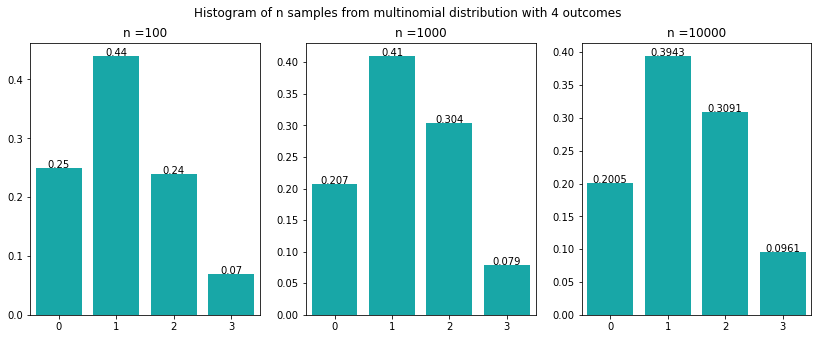

<Figure size 432x288 with 0 Axes>

In [ ]:
Num_outcomes = 4
Probs        = [0.2,0.4,0.3,0.1]

P1.plot_hist_multinomial(Probs)
plt.savefig("Multinomial")

### (b) Uniform distribution
Sample $n$ samples from uniform distribution over $[0,1]$ and plot histogram for different values of $n$

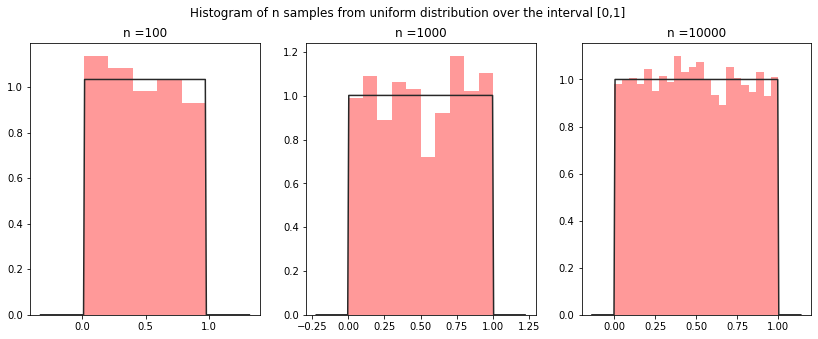

<Figure size 432x288 with 0 Axes>

In [ ]:
low  = 0
high = 1

P1.plot_hist_uniform(low, high)
plt.savefig("Uniform")

### (c) Gaussian distribution
Sample $n$ samples from gaussian distribution with $\mu = 0$ , $σ^2 = 1$ and plot histogram for different values of $n$

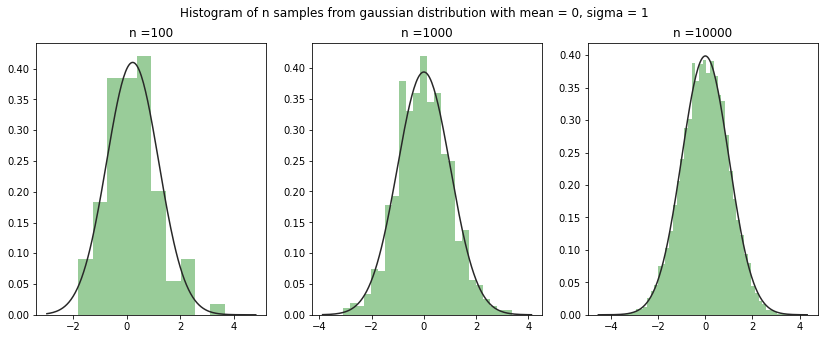

<Figure size 432x288 with 0 Axes>

In [ ]:
mu    = 0
sigma = 1

P1.plot_hist_gaussian(mu, sigma)
plt.savefig("Normal")

### (d) Exponential distribution
Sample $n$ samples from exponential distribution with parameter $λ = 0.5$ and plot histogram for different values of $n$

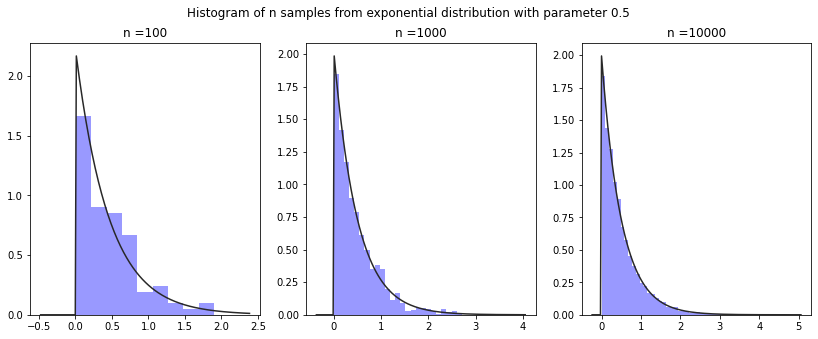

<Figure size 432x288 with 0 Axes>

In [ ]:
Parameter = 0.5

P1.plot_hist_exponential(Parameter)
plt.savefig("Exponential")

## PROBLEM 2

In [ ]:
class Problem_2:

    def __init__ (self, target_dist, mu = 0.0, sigma = 1.0, lambd = 1.0):

      self.target_dist = target_dist
      self.mu          = mu
      self.sigma       = sigma
      self.lambd       = lambd

    def inverse_transform_sampling (self, n):
      
      # Generate n samples from unifrom distribution over [0,1]
      u = np.random.randn(n) 
      
      # Use inverse CDF function of target distribution on these samples
      # to get samples from target distribution
      if self.target_dist == "gaussian":
        samples = stats.norm.ppf(q = u, loc = self.mu, scale = self.sigma)

      elif self.target_dist == "exponential":
        samples = stats.expon.ppf(q = u, scale = 1/self.lambd)

      return samples  
    
    def Box_Muller_Transform(self, n):
      # Generate n samples from unifrom distribution over [0,1]
      u = np.random.randn(n) 
      
      # Use inverse CDF function of target distribution on these samples
      # to get samples from target distribution
      if self.target_dist == "gaussian":
        samples = stats.norm.ppf(q = u, loc = self.mu, scale = self.sigma)

      elif self.target_dist == "exponential":
        samples = stats.expon.ppf(q = u, scale = 1/self.lambd)

      return samples  


    def plot_histogram (self, samples):

      if self.target_dist == "gaussian":
        sns.distplot(samples, color ='g', fit = stats.norm, kde=False)
        plt.title("Histogram of n = {} samples from gaussian distribution with mean = {}, sigma = {}".format(len(samples), self.mu, self.sigma))

      elif self.target_dist == "exponential":
        sns.distplot(samples, color ='g', fit = stats.expon, kde=False) 
        plt.title("Histogram of n = {} samples from exponential distribution with lambda = {}".format(len(samples), self.lambd))

      sns.set(rc={'figure.figsize':(12,9)}) 
      plt.show()  


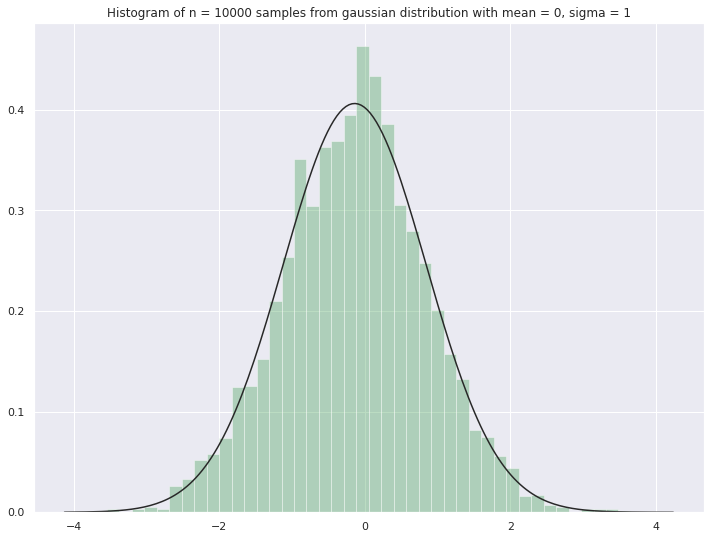

In [ ]:
# Specify the target distribution from which samples are to be generated
target_dist = "gaussian"

# Specify parameters of target distribution
mu    = 0
sigma = 1
lambd = 1

# Number of samples to be generated 
n  = 10000

P2 = Problem_2(target_dist, mu, sigma)

# Generate samples using inverse transform sampling method
samples = P2.inverse_transform_sampling(n)

# Plot the histogram to verify the distribution
P2.plot_histogram(samples)

## PROBLEM 3

Given any function $g(x)$ defined over an interval $[a,b]$, we can find the area under the function using the concept of expectation of a continuous random variable.
* First consider the independent variable $x$ to be a uniform random variable over the interval $[a,b]$.

* We know that pdf of a uniform random variable over an interval $[a,b]$ is given by,

$$
\begin {equation} 
f_X(x) = \begin{cases}
         \frac{1}{(b-a)} , a \geq x \leq b \\
         0  \quad, \mathrm{otherwise}
         \end{cases}
\end{equation}
$$

* Also we know that expectation of a function of continuous random variable is given by,

$$
\begin {equation} 
\mathbb{E}[g(x)] = \int_{x} g(x) f_X(x) dx               
\end{equation}
$$

* Therefore expectation of a function of uniform random variable can be written as,

$$
\begin {equation} 
\mathbb{E}[g(x)] = \int_{x = a}^{x = b} g(x) \times \frac{1}{(b-a)} dx               
\end{equation}
$$

* Now by rearranging the terms in the above equation we can get the area under the function $g(x)$ over the interval $[a,b]$ as,

$$
\begin {equation} 
\int_{x = a}^{x = b} g(x) dx = \mathbb{E}[g(x)] \times (b-a)              
\end{equation}
$$

* Since we cannot exactly compute $\mathbb{E}[g(x)]$, we approximate it by the sample mean $\mathrm{S}_n = \frac{1}{n} \sum_{i=1}^{n} g(x_i)$ which will almost surely converge to $\mathbb{E}[g(x)]$ as $n → ∞$ (by strong law of large numbers). Therefore area under the function $g(x)$ can be approximately obtained as,

$$
\begin {equation} 
\int_{x = a}^{x = b} g(x) dx ≈ (b-a) \times \frac{1}{n} \sum_{i=1}^{n} g(x_i)             
\end{equation}
$$


**Steps followed to find the area under $g(x)$ in the interval $[a,b]$**

* First we generate $n$ samples from uniform distribution in the interval $[a,b]$ and compute $g(x)$ to obtain $n$ samples of $g(x)$. 

* Next we take the sample mean ($\mathrm{S}_n$) of these $n$ samples to approximate $\mathbb{E}[g(x)]$. 

* Therefore $\mathrm{S}_n \times (b-a)$ will be approximately equal to the area of the function $g(x)$ and will converge almost surely to the true area as $n → ∞$ i.e, as $\mathrm{S}_n → \mathbb{E}[g(x)]$.

* Finally we compare the area obtained through this method with the  area obtained through integration method in the **scipy** package.


In [ ]:
class Problem_3:

  def __init__(self, func, a,b):

    self.func = func
    self.a    = a
    self.b    = b

  def scipy_method(self):

    area = integrate.quad(self.func,self.a,self.b)
    return area

  def sample_mean_method(self,n):
    
    # Generate 'n' samples from uniform distribution in the interval [a,b]
    x_samples   = np.random.uniform(self.a,self.b, (1,n))
    # Compute g(x)
    g_x_samples = self.func(x_samples)
    # Calculate sample mean
    S_n = np.mean(g_x_samples)
    # Obtain approximate area under the function g(x)
    area = S_n*(self.b - self.a)
    return area


### (a) $ g(x) = \sqrt{sin(x)}$ in the interval $[0,\pi]$ 

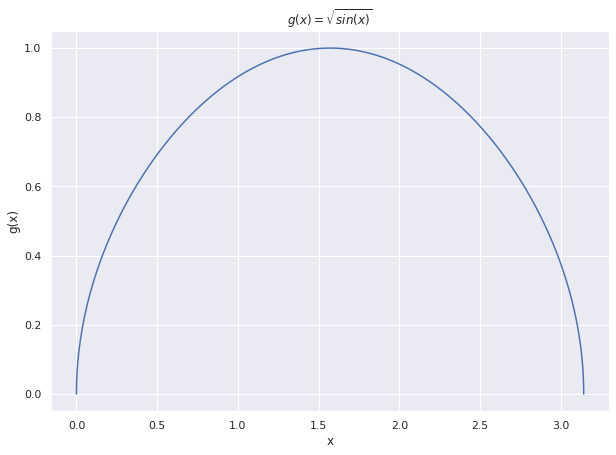


Area under g(x) obtained using scipy integration : 2.396

Area under g(x) obtained using expectation (sample mean) method : 2.397


In [ ]:
# Specify the interval
a  = 0
b  = np.pi

# define the function
def func_a(x):
  return np.sqrt(np.sin(x))

# Plot the function
x   = np.linspace(a,b,10000)
g_x = func_a(x)
plt.plot(x,g_x)
sns.set(rc={'figure.figsize':(6,6)})
plt.title(r"$g(x) = \sqrt{sin(x)}$")
plt.ylabel("g(x)")
plt.xlabel("x")
plt.show()

P_a = Problem_3(func_a, a, b)

# ====================================================================
# ========= Calculate area through scipy integration =================
# ====================================================================
scipy_area = P_a.scipy_method()

# ====================================================================
# ======== Calculate area using expectation (sample mean) ============
# ====================================================================

# Number of samples 
num_samples      = 100000
sample_mean_area = P_a.sample_mean_method(num_samples)


print("\nArea under g(x) obtained using scipy integration : {:.3f}".format(scipy_area[0]))
print("\nArea under g(x) obtained using expectation (sample mean) method : {:.3f}".format(sample_mean_area))

### (b) $ g(x) = \sqrt{sin(x)} \times e^{-x^2}$ in the interval $[0,\pi]$

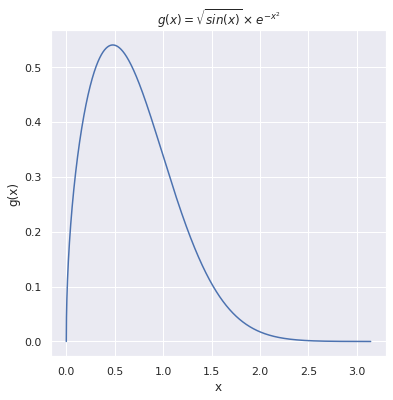


Area under g(x) obtained using scipy integration : 0.575

Area under g(x) obtained using expectation (sample mean) method : 0.574


In [ ]:
# Specify the interval
a  = 0
b = np.pi

# define the function
def func_b(x):
  return np.sqrt(np.sin(x)) * np.exp(-x**2)

# Plot the function
x   = np.linspace(a,b,10000)
g_x = func_b(x)
plt.plot(x,g_x)
sns.set(rc={'figure.figsize':(6,6)})
plt.title(r"$ g(x) = \sqrt{sin(x)} \times e^{-x^2}$")
plt.ylabel("g(x)")
plt.xlabel("x")
plt.show()

P_b = Problem_3(func_b, a, b)

# ====================================================================
# ========= Calculate area through scipy integration =================
# ====================================================================
scipy_area = P_b.scipy_method()

# ====================================================================
# ======== Calculate area using expectation (sample mean) ============
# ====================================================================

# Number of samples 
num_samples      = 100000
sample_mean_area = P_b.sample_mean_method(num_samples)


print("\nArea under g(x) obtained using scipy integration : {:.3f}".format(scipy_area[0]))
print("\nArea under g(x) obtained using expectation (sample mean) method : {:.3f}".format(sample_mean_area))

## PROBLEM 4

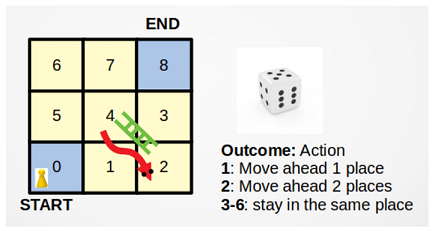

* As mentioned in the problem there are total of 9 states in the markov chain.

* Here upon entering state 2 or 4, probability of moving out of these states is 0.

* Probability transition matrix for the given problem can be defined as

\begin{equation}
\mathrm{P} = \begin{bmatrix}
              4/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 & 0 \\
              0 & 4/6 & 1/6 & 1/6 & 0 & 0 & 0 & 0 & 0 \\
              0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
              0 & 0 & 0 & 4/6 & 1/6 & 1/6 & 0 & 0 & 0 \\
              0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
              0 & 0 & 0 & 0 & 0 & 4/6 & 1/6 & 1/6 & 0 \\
              0 & 0 & 0 & 0 & 0 & 0 & 4/6 & 1/6 & 1/6 \\
              0 & 0 & 0 & 0 & 0 & 0 & 0 & 4/6 & 2/6 \\
              0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
     \end{bmatrix}
\end{equation}
* Since it is given that the initial state is 0, we can write initial state probabilities as $π_0 = [1,0,0,0,0,0,0,0,0]$.

* We can find the state probabilities after $n$ steps using the relation $\pi_n = \pi_0\mathrm{P}^n$.



### (a) Markov chain description

In [ ]:
# Number of states in markov chain
Num_states = 9

# States labels
states = [str(x) for x in np.arange(0,Num_states)]

# Probability transition matrix : (9 x 9)
P = np.array([[4/6,1/6,1/6,0,0,0,0,0,0],
              [0,4/6,1/6,1/6,0,0,0,0,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,4/6,1/6,1/6,0,0,0],
              [0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,4/6,1/6,1/6,0],
              [0,0,0,0,0,0,4/6,1/6,1/6],
              [0,0,0,0,0,0,0,4/6,2/6],
              [0,0,0,0,0,0,0,0,1]])

MC = pydtmc.MarkovChain(P, states)
# print(MC)
# pydtmc.plot_graph(MC, dpi=300)

### (b) Finding probability of win (probability of reaching end state)

#### ANALYTICAL METHOD

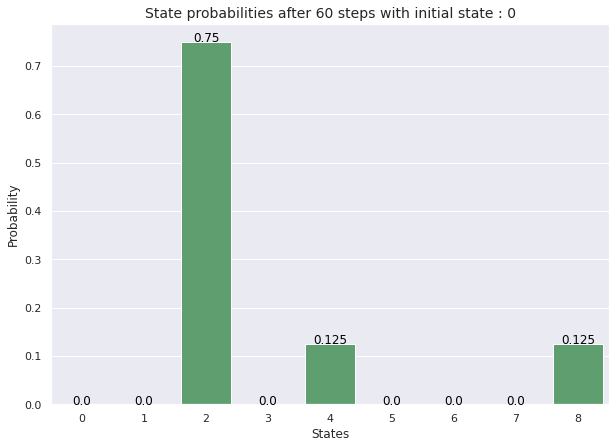

In [ ]:
# Initial state
In_state = 0
# End state
En_state = 8

# Initial state probabilities : (1 x 9)
pi_0             = np.zeros((1,Num_states))
pi_0[0,In_state] = 1

# Specify the number of times markov chain needs to be run
n = 60

# Calculating state probabilities after 'n' steps
P_n  = np.linalg.matrix_power(P,n)
pi_n = pi_0 @ P_n

bar = sns.barplot(x = np.arange(0, Num_states), y = pi_n[0], color="g")
sns.set(rc={'figure.figsize':(10,7)})
plt.rc('axes', titlesize= 14) 
plt.rc('axes', labelsize= 12)
plt.title("State probabilities after {} steps with initial state : {}".format(n, In_state))
plt.ylabel("Probability")
plt.xlabel("States")
for x, y in zip(np.arange(0, Num_states), pi_n[0]):
    bar.text(x,y, round(y,4), color='black', ha="center")
plt.show()

# For plot
pi           = pi_0
prob_win_ana = []
for i in range(1,n+1):
  prob_win_ana.append(pi[0,En_state])
  pi = pi @ P

# OBSERVATION
# State probabilities after 'n' runs i.e, pi_n depends on the initial state and 
# will converge to different distributions (PMFs) based on initial state

#### MONTE CARLO SIMULATION METHOD

* The steps followed in this method is given below, 

  1) The markov chain is initilazed at the given initial state

  2) The markov chain is run till it reaches end state (8) or the states 2 or 4

  3) Step 1 and 2 is repeated for several times

  4) Finally probability of being in end state or the probability of winning is calculated as number of times markov chain reached end state by total number of times the markov chain was run


In [ ]:
# Number of random walks to be simulated
num_walks = 50000
wins      = 0
prob_win_moc  = []
walk_len = []

for num in range (1,num_walks+1):
  prob_win_moc.append(wins/num)
  # Start the walk from initial state
  walk  = [states[In_state]]
  while True:
    current_state = walk[-1]
    # Obtain next state according to the defined transition matrix
    next_state    = MC.next_state(current_state)
    walk.append(next_state)   
    # Stop the random walk if it enters any of these states
    if next_state == "8":
      wins = wins + 1
      walk_len.append(len(walk))
      break
    if next_state == "2" or next_state == "4":
      break    

#### COMPARISION

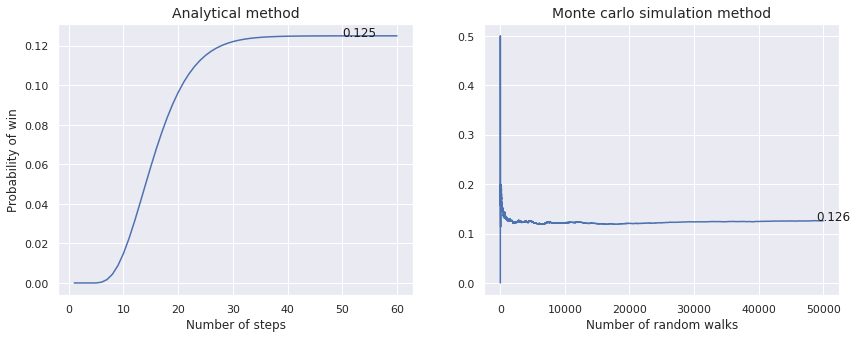


Probability of winning (reaching end state 8) with initial state 0

Analytical method             : 0.125

Monte carlo simulation method : 0.126


In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5))

sns.lineplot(x = list(range(1, n+1)), y = prob_win_ana, ax = axes[0])
axes[0].set_title("Analytical method")
axes[0].text(n-10,prob_win_ana[n-1],f'{prob_win_ana[n-1]:.3f}',color='k')
axes[0].set_ylabel("Probability of win")
axes[0].set_xlabel("Number of steps")

sns.lineplot(x = list(range(1, num_walks+1)), y = prob_win_moc, ax = axes[1])
axes[1].set_title("Monte carlo simulation method")
axes[1].text(num_walks-1000,prob_win_moc[num_walks-1],f'{prob_win_moc[num_walks-1]:.3f}',color='k')
axes[1].set_xlabel("Number of random walks")

plt.show()

print("\nProbability of winning (reaching end state {}) with initial state {}\n".format(En_state,In_state))
print("Analytical method             : {:.3f}\n".format(prob_win_ana[-1]))
print("Monte carlo simulation method : {:.3f}".format(prob_win_moc[-1]))